In [1]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

C:\David\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# def a function to create a nn layer
def add_layer(inputs, n_features, l_units, layer_name ,activation = None): # we set the default activation as none
    layer_name = layer_name
    with tf.name_scope("layer"):
        with tf.name_scope("Weight"):
            W = tf.Variable(tf.random_normal([n_features, l_units]), name = 'W')
            tf.summary.histogram(layer_name + '/Weight', W)
        with tf.name_scope("Bias"):
            bias = tf.Variable(tf.ones([1,l_units])/5, name = 'b')
            tf.summary.histogram(layer_name + '/Bias', bias)
        with tf.name_scope("Wx_plus_bias"):
            Wx_plus_bias = tf.matmul(inputs, W) + bias # not that the matrix is m by l, which means m data and l units at the layer
        if activation is None:
            output =  Wx_plus_bias # a linear response returned
        else:
            output = activation(Wx_plus_bias)
        
        tf.summary.histogram(layer_name + 'Output', output)
        return output

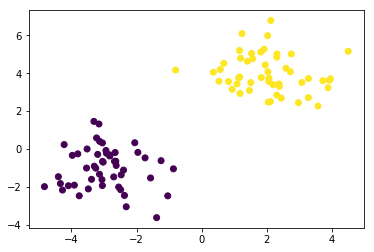

In [3]:
# create two groups of data by make_blobs
X, Y = make_blobs(centers=[[-3,-1],[2,4]], n_samples= 100, n_features=2, random_state= 87)
X = X.astype(np.float32)
Y = Y.reshape(-1,1).astype(np.float32)

plt.scatter(X[:,0],X[:,1] ,c = Y.ravel())
plt.show()

In [4]:
with tf.name_scope("inputs"): # the outer box
    X_input = tf.placeholder(tf.float32, [None,2], name = 'x_inputs') # [None, 2] means None by 2 matrix
    target = tf.placeholder(tf.float32, [None,1], name = 'y_inputs') # [None, 2] means None by 1 matrix

hidden = add_layer(X_input, 2, 10,layer_name = 'hidden_layer' ,activation=tf.nn.relu) #first hidden layer has 10 units 
output = add_layer(hidden, 10, 1, layer_name = 'output_ayer',activation=tf.nn.sigmoid) # one unit output

with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(target - output)))
    tf.summary.scalar('loss',loss)
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()

merge = tf.summary.merge_all()
writer = tf.summary.FileWriter('./log_tb2/', sess.graph)

sess.run(init)

for i in range(181):
    sess.run(optimizer, feed_dict = {X_input : X, target: Y})
    loss_val = sess.run(loss, feed_dict = {X_input : X, target: Y})
    if i % 10 == 0:
        merge_result = sess.run(merge, feed_dict = {X_input: X, target: Y})
        writer.add_summary(merge_result, i)
        print("At step %d" % (i+1) )
        print("the loss = {}".format(loss_val))
        print("---------------------------------")

At step 1
the loss = 17.844697952270508
---------------------------------
At step 11
the loss = 9.295032178329423e-22
---------------------------------
At step 21
the loss = 9.295032178329423e-22
---------------------------------
At step 31
the loss = 9.295032178329423e-22
---------------------------------
At step 41
the loss = 9.295032178329423e-22
---------------------------------
At step 51
the loss = 9.295032178329423e-22
---------------------------------
At step 61
the loss = 9.295032178329423e-22
---------------------------------
At step 71
the loss = 9.295032178329423e-22
---------------------------------
At step 81
the loss = 9.295032178329423e-22
---------------------------------
At step 91
the loss = 9.295032178329423e-22
---------------------------------
At step 101
the loss = 9.295032178329423e-22
---------------------------------
At step 111
the loss = 9.295032178329423e-22
---------------------------------
At step 121
the loss = 9.295032178329423e-22
---------------------